# Data Cleaning

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import listdir
from os.path import isfile, join
import plotly.graph_objs as go

In [139]:
listdir(mypath)[:-4]

['KCLT.csv',
 'KCQT.csv',
 'KHOU.csv',
 'KIND.csv',
 'KJAX.csv',
 'KMDW.csv',
 'KNYC.csv',
 'KPHL.csv',
 'KPHX.csv',
 'KSEA.csv']

In [83]:
cities = {"KCLT": 'Charlotte, NC', "KCQT": "Los Angeles, CA", "KHOU": "Houston, TX", "KIND":"Indianapolis, IN", "KJAX": "Jacksonville, FL", "KMDW":"Chicago, IL", "KNYC":"New York, NY", "KPHL": "Philadelphia, PA","KPHX":"Phoenix, AZ", "KSEA":"Seattle, WA"}

In [84]:
mypath = r'us-weather-history'
df = pd.DataFrame()

total_number_rows = 0
for f in listdir(mypath):
    if 'csv' in f:
        df_temp = pd.read_csv(mypath+'\\'+f)
        df_temp['GroupName'] = [f[:-4]]*df_temp.shape[0]
        total_number_rows+=df_temp.shape[0]
        print(df_temp.shape)
        print(df_temp.dtypes, end ='\n')
        df = pd.concat([df, df_temp], axis=0, ignore_index=True, join='outer')
print('total_number_rows:', total_number_rows)
print(df.shape)

(365, 14)
date                      object
actual_mean_temp           int64
actual_min_temp            int64
actual_max_temp            int64
average_min_temp           int64
average_max_temp           int64
record_min_temp            int64
record_max_temp            int64
record_min_temp_year       int64
record_max_temp_year       int64
actual_precipitation     float64
average_precipitation    float64
record_precipitation     float64
GroupName                 object
dtype: object
(365, 14)
date                      object
actual_mean_temp           int64
actual_min_temp            int64
actual_max_temp            int64
average_min_temp           int64
average_max_temp           int64
record_min_temp            int64
record_max_temp            int64
record_min_temp_year       int64
record_max_temp_year       int64
actual_precipitation     float64
average_precipitation    float64
record_precipitation     float64
GroupName                 object
dtype: object
(365, 14)
date              

In [85]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by=['GroupName','date'], inplace=True, ascending=True)

In [86]:
df.iloc[[0,-1],:]

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation,GroupName
0,2014-07-01,81,70,91,67,89,56,104,1919.0,2012.0,0.0,0.10,5.91,KCLT
3649,2015-06-30,73,59,87,54,73,43,96,1949.0,1995.0,0.0,0.04,0.84,KSEA


In [87]:
print('Data types in each column\n')
df.dtypes

Data types in each column



date                     datetime64[ns]
actual_mean_temp                  int64
actual_min_temp                   int64
actual_max_temp                   int64
average_min_temp                  int64
average_max_temp                  int64
record_min_temp                   int64
record_max_temp                   int64
record_min_temp_year            float64
record_max_temp_year            float64
actual_precipitation            float64
average_precipitation           float64
record_precipitation            float64
GroupName                        object
dtype: object

In [6]:
print('number of nans found\n')
df.isna().sum()

number of nans found



date                     0
actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     1
record_max_temp_year     1
actual_precipitation     0
average_precipitation    0
record_precipitation     0
GroupName                0
dtype: int64

In [7]:
df[df.isna().any(axis=1)]

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation,GroupName
1992,2014-12-15,46,43,48,23,35,-8,64,1989.0,NaN,0.12,0.08,1.14,KMDW
2098,2015-03-31,49,41,57,36,53,12,85,NaN,1986.0,0.00,0.11,2.50,KMDW


In [8]:
df.fillna(method='backfill', axis=0, inplace=True)

In [9]:
print('Count, mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile and maximum of numerical values\n') 
df.describe()

Count, mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile and maximum of numerical values



,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000
mean,61.523014,52.080000,70.453699,51.378082,70.122740,32.782192,88.092877,1944.849589,1964.095342,0.100849,0.103359,1.944164
std,17.904780,17.304953,19.110421,14.937838,16.747828,19.775042,13.368581,37.874410,34.563293,0.311291,0.053140,1.263023
min,1.000000,-7.000000,7.000000,18.000000,31.000000,-27.000000,51.000000,1871.000000,1871.000000,0.000000,0.000000,0.000000
25%,50.000000,41.000000,58.000000,41.000000,59.000000,21.000000,80.000000,1912.000000,1941.000000,0.000000,0.080000,1.130000
50%,65.000000,55.000000,74.000000,51.000000,72.000000,35.000000,90.000000,1952.000000,1969.000000,0.000000,0.110000,1.740000
75%,75.000000,65.000000,85.000000,64.000000,83.000000,48.000000,98.000000,1975.000000,1991.000000,0.020000,0.130000,2.490000
max,105.000000,94.000000,116.000000,84.000000,107.000000,70.000000,122.000000,2015.000000,2015.000000,4.340000,0.290000,10.340000


In [136]:
df.to_csv('df.csv')

The data is a collection of weather data for the US cities of Charlotte (NC), Los Angeles (CA), Houston (TX), Indianapolis (IN), Jacksonville (FL), Chicago (IL), New York (NY), Philadelphia (PA), Phoenix (AZ) and Seattle (WA) for the dates between July 2014 to June 2015. The data shows:
- The maximum, minimum and average temperatures measured each day.
- The maximum, minimum and average temperatures recorded historically.
- The measured, historically recorded and average rain fall for each day.

# Visualizing the Data

In [134]:
def facet_plot(df, cols, y, GroupName, ):

    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    df_1 = df.copy(deep=True)
    df_1[y] = df_1[y].apply(lambda x:x.month)

    pal1 = sns.cubehelix_palette(10, rot=0.6,dark=0.3, light=.7)
    pal2 = sns.cubehelix_palette(10, rot=-0.2,dark=0.3, light=.7)

    g = sns.FacetGrid(df_1[df_1['GroupName']==GroupName], row=y, hue=y, aspect=15, height=.5, palette=pal1, legend_out=True)
    
    for col in cols:
        g.map(sns.kdeplot, col, bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5, legend=True)
        g.map(sns.kdeplot, col, clip_on=False, color="w", lw=2, bw_adjust=.5, legend=True)
        
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .15, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes, fontsize=20)
    
    
    g.map(label, 'actual_max_temp')

    g.fig.subplots_adjust(hspace=-.25)
    title = cols[0].split('_')

    g.axes[0,0].set_title(title[0].capitalize()+' '+title[2].capitalize()+' Maximum and Minimum Distributions for Months between Jul. 2014 to Jun. 2015')
    for i in range(1,12):
        g.axes[i,0].set_title("")
    g.axes[11,0].set_xlabel("Temperature")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    g.fig.set_size_inches(15,15)

The plot below explores the distribution of the minimum and maximum measured temperature for each month. It shows a greater dispersion of in the colder months when compared with the months closer in the summer season.

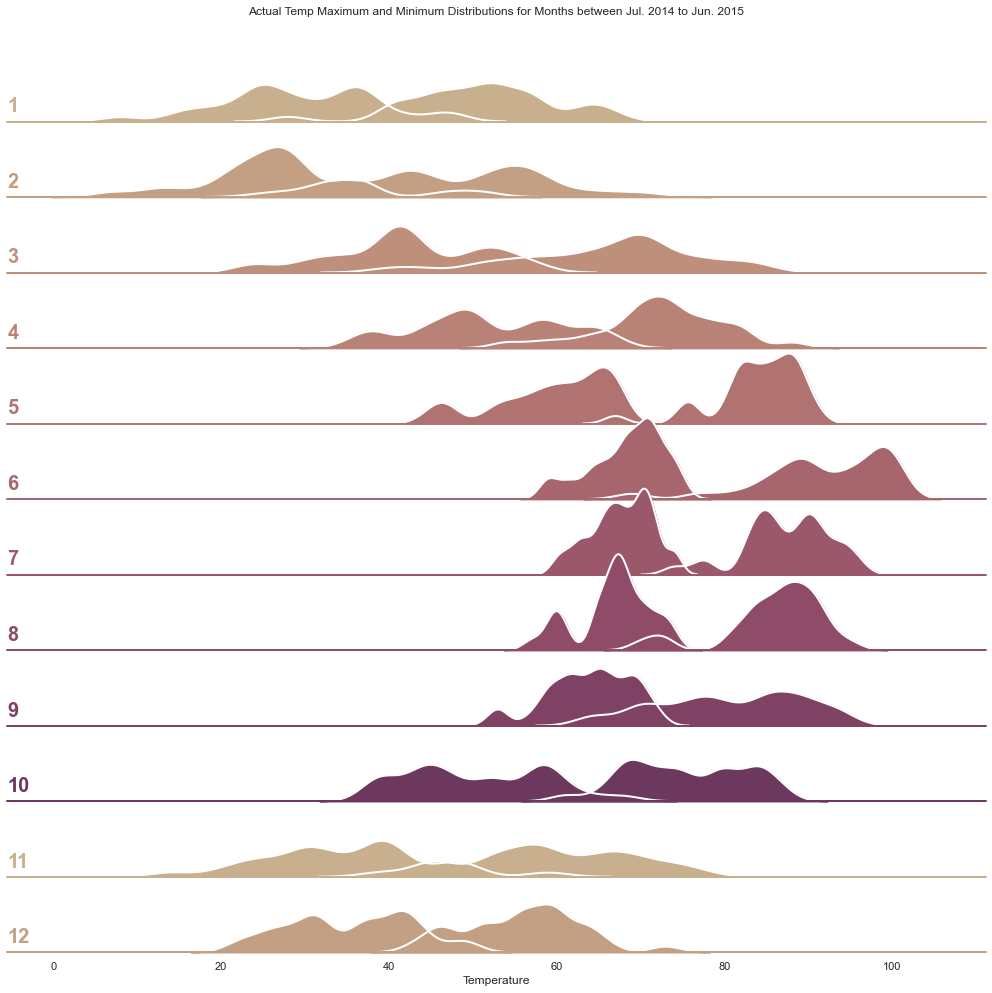

In [135]:
facet_plot(df, ['actual_min_temp', 'actual_max_temp'], 'date', 'KCLT')

The plot below shows a candle chart with maximum and minimum temperature represented in each stick. The grey graph is the historical minimum and maximum values, these are compared with the overall minimum and maximum average and measured on-the-day temperatures represented by the red and cyan graphs respectively. When the cyan graphs breaks through the grey boarder it means the a new record minimum or maximum temperature was measured on that day.

In [78]:
def recorded_actual_temp(df, g_name):
    df_g = df.copy(deep=True)
    df_g = df_g[df_g['GroupName']==g_name]

    actual=go.Candlestick(x=df_g['date'], open=df_g['actual_max_temp'], high=df_g['actual_max_temp'], low=df_g['actual_min_temp'], close=df_g['actual_min_temp'], increasing_line_color= 'cyan', decreasing_line_color= 'cyan', hoverinfo = 'skip', showlegend=True, legendgroup='Actual', name= 'Actual')

    average = go.Candlestick(x=df_g['date'], open=df_g['average_max_temp'], high=df_g['average_max_temp'], low=df_g['average_min_temp'], close=df_g['average_min_temp'], increasing_line_color= 'lightcoral', decreasing_line_color= 'lightcoral', hoverinfo = 'skip', showlegend=True, legendgroup='Average', name= 'Average')

    recorded=go.Candlestick(x=df_g['date'], open=df_g['record_max_temp'], high=df_g['record_max_temp'], low=df_g['record_min_temp'], close=df_g['record_min_temp'], hoverinfo = 'skip', increasing_line_color= 'gray', decreasing_line_color= 'gray', showlegend=True, legendgroup='Recorded', name= 'Recorded')
    
    figSignal = go.Figure(data=[recorded, average, actual])
    
    figSignal.update_layout( margin=dict(l=20, r=20, t=20, b=20), width=1200, height=600, 
                        xaxis=go.layout.XAxis(linecolor = 'black', linewidth = 1, mirror = True,fixedrange = False, rangeslider={'visible':False},
                                              showticklabels=True, tickvals=pd.date_range('2014-07', '2015-06', freq='MS'),
                        title_text='Recorded vs Actual Temperature at '+cities[g_name]))
    figSignal.show()

In [79]:
recorded_actual_temp(df, 'KCLT')
#  axis_rangeslider_visible=False,

In [140]:
def perp(df, g_name):
    df_p = df.copy(deep=True)
    df_p = df_p[['date', 'actual_precipitation','average_precipitation','record_precipitation']]
    df_p = df_p[df['GroupName']==g_name]
    fig, ax = plt.subplots(1,1,figsize=(15,12))
    sns.lineplot(data=df_p, linewidth=2.5, ax=ax)
    ax.set_title("Recorded, Actual and Average Percipitation from Jul. 2014 to Jun. 2015 in "+cities[g_name])
    ax.legend(frameon=False)
    ax.set_ylabel("Percipitation (inches)")
    ax.set_xlabel("Date")
    plt.show()
# g.fig.set_size_inches(15,15)

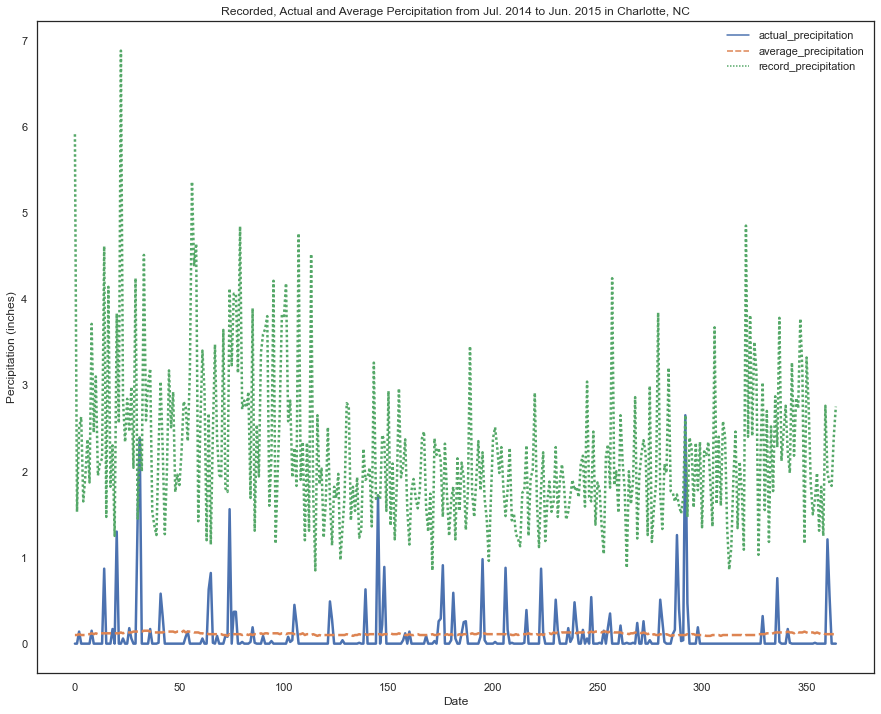

In [141]:
 perp(df, g_name = 'KCLT')